<a href="https://colab.research.google.com/github/filipesartori/Inteligencia-Artificial2/blob/main/Busca_Gulosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GRAFOS


In [ ]:
class Vertice:
  def __init__(self, rotulo, distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  def adiciona_adjacente(self, adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)  

In [ ]:
class Adjacente:
  def __init__(self, vertice, custo):
    self.vertice = vertice 
    self.custo = custo
    

Mapa de caminhos

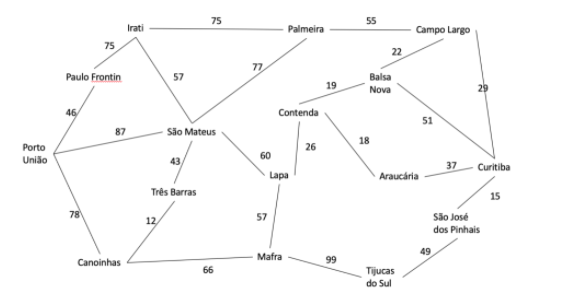

In [ ]:
class Grafo:
  portouniao = Vertice('Porto União', 203)
  paulofrontin = Vertice('Paulo Frontin', 172)
  canoinhas = Vertice('Canoinhas', 141)
  tresbarras = Vertice('Três barras', 131)
  saomateus = Vertice('São Mateus', 123)
  irati = Vertice('Irati', 139)
  curitiba = Vertice('Curitiba', 0)
  palmeira = Vertice('Palmeira', 59)
  mafra = Vertice('Mafra', 94)
  campolargo = Vertice('Campo Largo', 27)
  balsanova = Vertice('Balsa Nova', 41)
  lapa = Vertice('Lapa', 74)
  tijucasdosul = Vertice('Tijucas do Sul', 56)
  araucaria = Vertice('Araucária', 23)
  saojosedospinhais = Vertice('São José dos Pinhais', 13)
  contenda = Vertice('Contenda', 39)

  portouniao.adiciona_adjacente(Adjacente(paulofrontin, 46))
  portouniao.adiciona_adjacente(Adjacente(saomateus, 87))
  portouniao.adiciona_adjacente(Adjacente(canoinhas, 78))

  canoinhas.adiciona_adjacente(Adjacente(portouniao, 78))
  canoinhas.adiciona_adjacente(Adjacente(tresbarras, 12 ))
  canoinhas.adiciona_adjacente(Adjacente(mafra, 66))

  paulofrontin.adiciona_adjacente(Adjacente(portouniao, 46))
  paulofrontin.adiciona_adjacente(Adjacente(irati, 75))

  saomateus.adiciona_adjacente(Adjacente(portouniao, 87))
  saomateus.adiciona_adjacente(Adjacente(irati, 57))
  saomateus.adiciona_adjacente(Adjacente(palmeira, 77))
  saomateus.adiciona_adjacente(Adjacente(tresbarras, 43))
  saomateus.adiciona_adjacente(Adjacente(lapa, 60))

  tresbarras.adiciona_adjacente(Adjacente(canoinhas, 12))
  tresbarras.adiciona_adjacente(Adjacente(saomateus, 43))

  irati.adiciona_adjacente(Adjacente(paulofrontin, 46))
  irati.adiciona_adjacente(Adjacente(palmeira, 75))
  irati.adiciona_adjacente(Adjacente(saomateus, 57))

  mafra.adiciona_adjacente(Adjacente(canoinhas, 66))
  mafra.adiciona_adjacente(Adjacente(tijucasdosul, 99))
  mafra.adiciona_adjacente(Adjacente(lapa, 57))

  palmeira.adiciona_adjacente(Adjacente(irati, 75))
  palmeira.adiciona_adjacente(Adjacente(campolargo, 55))
  palmeira.adiciona_adjacente(Adjacente(saomateus, 77))

  contenda.adiciona_adjacente(Adjacente(lapa, 26))
  contenda.adiciona_adjacente(Adjacente(balsanova, 19))
  contenda.adiciona_adjacente(Adjacente(araucaria, 18))

  tijucasdosul.adiciona_adjacente(Adjacente(mafra, 99))
  tijucasdosul.adiciona_adjacente(Adjacente(saojosedospinhais, 49))

  campolargo.adiciona_adjacente(Adjacente(palmeira, 55))
  campolargo.adiciona_adjacente(Adjacente(balsanova, 22))
  campolargo.adiciona_adjacente(Adjacente(curitiba, 29))

  balsanova.adiciona_adjacente(Adjacente(campolargo, 22))
  balsanova.adiciona_adjacente(Adjacente(contenda, 19))
  balsanova.adiciona_adjacente(Adjacente(curitiba, 51))

  araucaria.adiciona_adjacente(Adjacente(contenda, 18))
  araucaria.adiciona_adjacente(Adjacente(curitiba, 37))

  saojosedospinhais.adiciona_adjacente(Adjacente(tijucasdosul, 49))
  saojosedospinhais.adiciona_adjacente(Adjacente(curitiba, 15))

  curitiba.adiciona_adjacente(Adjacente(campolargo, 29))
  curitiba.adiciona_adjacente(Adjacente(saojosedospinhais, 15))
  curitiba.adiciona_adjacente(Adjacente(araucaria, 37))
  curitiba.adiciona_adjacente(Adjacente(balsanova, 51))

  lapa.adiciona_adjacente(Adjacente(saomateus, 60))
  lapa.adiciona_adjacente(Adjacente(mafra, 57))
  lapa.adiciona_adjacente(Adjacente(contenda, 26))

In [ ]:
grafo = Grafo()

## Vetor Ordenado


In [ ]:
import numpy as np
class VetorOrdenado:
  
  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade, dtype=object)

  def insere(self, vertice):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_objetivo > vertice.distancia_objetivo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = vertice
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' - ', self.valores[i].rotulo, ' - ', self.valores[i].distancia_objetivo) 

## Busca Gulosa

In [ ]:
class Gulosa:
  def __init__(self, objetivo):
    self.objetivo = objetivo 
    self.encontrado = False

  def buscar(self, atual):
    print('------------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente.vertice)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0])      

In [ ]:
busca_gulosa = Gulosa(grafo.curitiba)
busca_gulosa.buscar(grafo.portouniao)

------------
Atual: Porto União
0  -  São Mateus  -  123
1  -  Canoinhas  -  141
2  -  Paulo Frontin  -  172
------------
Atual: São Mateus
0  -  Palmeira  -  59
1  -  Lapa  -  74
2  -  Três barras  -  131
3  -  Irati  -  139
------------
Atual: Palmeira
0  -  Campo Largo  -  27
------------
Atual: Campo Largo
0  -  Curitiba  -  0
1  -  Balsa Nova  -  41
------------
Atual: Curitiba
